# Installing packages
If your conda environment is new, you can install required packages using:  
`conda create --name satimg python`  
`conda install numpy pytz ipywidgets xarray netcdf4 cartopy matplotlib scipy geopandas`  
If geopandas does not install, use: `pip install geopandas`  
You may need this version of scipy: `conda install scipy=1.10.0`  
`pip install git+https://github.com/iterative/PyDrive2.git#egg=PyDrive2` 

# Downloading and reading image data

Downloading from AWS website: https://home.chpc.utah.edu/~u0553130/Brian_Blaylock/cgi-bin/goes16_download.cgi  
List of available products and their identification codes: https://github.com/awslabs/open-data-docs/tree/main/docs/noaa/noaa-goes16

In [2]:
import os
import re

# You can create a list of number strings by using: [f"{i:02}" for i in range(13)]
destination_path = '.\\GOESimages\\'
bucket = 'noaa-goes16'
satellite = bucket[re.search('noaa-',bucket).end():]
day, month, year = '05', '08', '2023' # Date in dd/mm/yyyy format
hour = '17' # UTC, should be a string number between '00' and '23'
product=['ABI-L2-DSRF','ABI-L2-ACMF','ABI-L2-TPWF','ABI-L2-RRQPEF','ABI-L2-LSTF'] # Product to select
channel=['C01','C02','C03'] # Number of band to select from 'C01' to 'C16'

# Select a product and channel to process
selected_product = product[2]
domain = selected_product[-1]
selected_channel = channel[0]

FilePath = os.path.join(destination_path,satellite,year, month, day, selected_product,hour)
if ( selected_product[:-1] == "ABI-L1b-Rad") or (selected_product[:-1] == "ABI-L2-CMIP") :
    FilePath = os.path.join(FilePath,selected_channel)
print("Processing files in path: {}".format(FilePath))

if os.path.exists(FilePath):
    files = os.listdir(FilePath)
    display(files)
else: print("Directory does not exist.")

Processing files in path: .\GOESimages\goes16\2023\08\05\ABI-L2-TPWF\17


['OR_ABI-L2-TPWF-M6_G16_s20232171700204_e20232171709512_c20232171711237.nc',
 'OR_ABI-L2-TPWF-M6_G16_s20232171710202_e20232171719510_c20232171721193.nc',
 'OR_ABI-L2-TPWF-M6_G16_s20232171720202_e20232171729510_c20232171731143.nc',
 'OR_ABI-L2-TPWF-M6_G16_s20232171730202_e20232171739510_c20232171741117.nc',
 'OR_ABI-L2-TPWF-M6_G16_s20232171740202_e20232171749510_c20232171751151.nc',
 'OR_ABI-L2-TPWF-M6_G16_s20232171750202_e20232171759510_c20232171801193.nc']

## Using goespy package
GitHub: https://github.com/spestana/goes-py
You can install goespy package by running:  
`git clone https://github.com/palexandremello/goes-py.git`  
`cd goes-py`  
`python setup.py install`  
When running for first time, if you have an error like ImportError: cannot import name **'DEPRECATED_SERVICE_NAMES' from 'botocore.docs' (c:\Users\germa\anaconda3\envs\satimg\lib\site-packages\botocore\docs\_\_init\_\_.py)**, you may need to run:  
`pip install boto3`  
`pip install botocore`

If you have the same error in the future, use:
`conda update botocore`

In [43]:
from goespy.Downloader import ABI_Downloader
# help(ABI_Downloader)
ABI = ABI_Downloader(destination_path,bucket,year,month,day,hour,product,channel)

## Using goes2go package
Source: https://blaylockbk.github.io/goes2go/_build/html/index.html#  
GitHub: https://github.com/blaylockbk/goes2go  
You can install goes2go package by following command:  
`conda install -c conda-forge goes2go`  
You may also need to install:  
`conda install -c conda-forge h5netcdf`  
Also, to be able to totally choose destination path of downloaded images, you need to make this change in *data.py/_download/do_download* function which is in the folder: C:\Users\germa\anaconda3\envs\satimg\Lib\site-packages\goes2go
```
filename = os.path.basename(src)
dst = Path(save_dir) / filename
print("Destination path will be: {}".format(dst))
# dst = Path(save_dir) / src
```

In [3]:
import goes2go as g2g
from datetime import datetime
import matplotlib.pyplot as plt
g = g2g.data.goes_nearesttime(datetime(2023, 9, 10, 23),
                     satellite='goes16',
                     domain='F',
                     product='ABI', 
                     save_dir=destination_path,
                     return_as='xarray')

 👮🏻‍♂️ File already exists. Do not overwrite: GOESimages\noaa-goes16\ABI-L2-MCMIPF\2023\253\23\OR_ABI-L2-MCMIPF-M6_G16_s20232532300204_e20232532309524_c20232532309598.nc
📦 Finished downloading [1] files to [GOESimages\noaa-goes16\ABI-L2-MCMIPF].
📚 Finished reading [1] files into xarray.Dataset.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

c:\Users\germa\anaconda3\envs\satimg\Lib\site-packages\matplotlib\cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


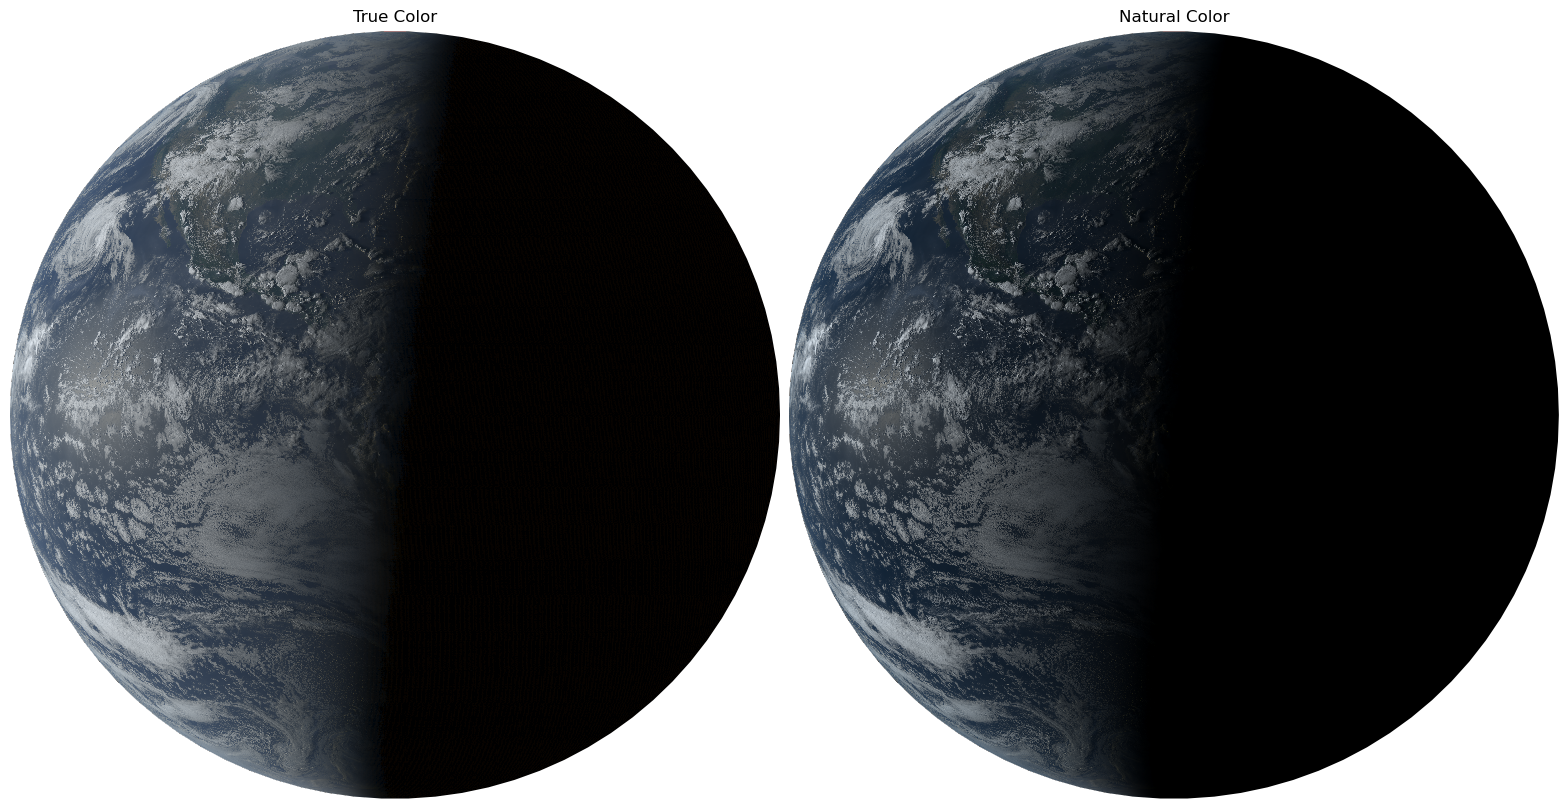

In [4]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=[20,10], subplot_kw=dict(projection=g.rgb.crs))
ax1.imshow(g.rgb.TrueColor(night_IR=False), **g.rgb.imshow_kwargs)
ax1.set_title('True Color', color='k')
ax1.axis('off')

ax2.imshow(g.rgb.NaturalColor(night_IR=False), **g.rgb.imshow_kwargs)
ax2.set_title('Natural Color', color='k')
ax2.axis('off')

plt.subplots_adjust(wspace=0.01)
fig.set_facecolor('w')

In [45]:
# # Get the latest available GOES data.
# # data = g2g.data.goes_latest(satellite=satellite,product=product,domain=domain,save_dir=destination_path,
# #                      return_as='xarray',download=False,bands=1)
                    
# # Get the GOES data nearest a specified time.
# data = g2g.data.goes_nearesttime(date_str[0],satellite=satellite,product=product,domain=domain,save_dir=destination_path,
#                      return_as='xarray',download=False,bands=1)

# # Get GOES data for a time range.
# # data = g2g.data.goes_timerange(start=date_str[0], end=date_str[1],
# #                                satellite=satellite,product=product,domain=domain,
# #                                return_as='xarray',download=False,bands=1,
# #                                save_dir=destination_path)
# data

In [46]:
import ipywidgets as widgets

files = os.listdir(FilePath)
files = [file for file in files if file.endswith('.nc')]
print("GOES images available:")
display(files)

# Create dropdown widget with index values of files list
file_selector = widgets.Dropdown(
    options=list(range(len(files))),
    value=0,
    description='Select file:',
)

# Define function to display selected file
def on_file_select(change):
    global selected_index
    selected_index = change['new']
    print(f'Selected file: {files[selected_index]}')

# Call function to display initial file
on_file_select({'new': file_selector.value})

# Link widget selection to function call
file_selector.observe(on_file_select, names='value')
display(file_selector)
FileName = files[selected_index]

GOES images available:


['OR_ABI-L2-TPWF-M6_G16_s20232171700204_e20232171709512_c20232171711237.nc',
 'OR_ABI-L2-TPWF-M6_G16_s20232171710202_e20232171719510_c20232171721193.nc',
 'OR_ABI-L2-TPWF-M6_G16_s20232171720202_e20232171729510_c20232171731143.nc',
 'OR_ABI-L2-TPWF-M6_G16_s20232171730202_e20232171739510_c20232171741117.nc',
 'OR_ABI-L2-TPWF-M6_G16_s20232171740202_e20232171749510_c20232171751151.nc',
 'OR_ABI-L2-TPWF-M6_G16_s20232171750202_e20232171759510_c20232171801193.nc']

Selected file: OR_ABI-L2-TPWF-M6_G16_s20232171700204_e20232171709512_c20232171711237.nc


Dropdown(description='Select file:', options=(0, 1, 2, 3, 4, 5), value=0)

In [47]:
from datetime import datetime
# Building image name format
start_date_str = FileName.split("_s")[1][:13]
start_date = datetime.strptime(start_date_str, "%Y%j%H%M%S").strftime('%Y-%m-%d %H:%M:%S')
img_year, img_month, img_day = start_date[:4], start_date[5:7], start_date[8:10]
img_hour, img_minute, img_seconds = start_date[11:13], start_date[14:16], start_date[17:20]
if ( selected_product[:-1] == "ABI-L1b-Rad") or (selected_product[:-1] == "ABI-L2-CMIP"):
    ImageName = satellite +'_'+ img_year +'_'+ img_month +'_'+ img_day +'_'+ selected_product.split('-')[-1] +'_'+ selected_channel +'_'+ img_hour +'_'+ img_minute + '.png'
else: ImageName = satellite +'_'+ img_year +'_'+ img_month +'_'+ img_day +'_'+ selected_product.split('-')[-1] +'_'+ img_hour +'_'+ img_minute + '.png'
FullImagePath = os.path.join(FilePath, ImageName)

# Satellite Image Visualization for L1 products

In [48]:
#==================== Read the dataset and its metadata ====================
import xarray as xr

FullFilePath = os.path.join(FilePath,FileName)
data = xr.open_dataset(FullFilePath, engine='netcdf4')
if ('lon' in data.coords) and ('lat' in data.coords): coords = "lonlat"
elif ('x' in data.coords) and ('y' in data.coords): coords = "xy"
data

<xarray.Dataset>
Dimensions:                                           (y: 1086, x: 1086,
                                                       number_of_time_bounds: 2,
                                                       number_of_image_bounds: 2,
                                                       number_of_LZA_bounds: 2,
                                                       number_of_SZA_bounds: 2,
                                                       number_of_lat_bounds: 2,
                                                       sounding_emissive_bands: 7)
Coordinates:
    t                                                 datetime64[ns] ...
  * y                                                 (y) float64 0.1519 ... ...
  * x                                                 (x) float64 -0.1519 ......
    y_image                                           float32 ...
    x_image                                           float32 ...
    retrieval_local_zenith_angle                      float32 ...
    quantitative_local_zenith_angle                   float32 ...
    solar_zenith_angle                                float32 ...
    latitude                                          float32 ...
    sounding_emissive_wavelengths                     (sounding_emissive_bands) float32 ...
    sounding_emissive_band_ids                        (sounding_emissive_bands) int8 ...
Dimensions without coordinates: number_of_time_bounds, number_of_image_bounds,
                                number_of_LZA_bounds, number_of_SZA_bounds,
                                number_of_lat_bounds, sounding_emissive_bands
Data variables: (12/29)
    TPW                                               (y, x) float32 ...
    DQF_Overall                                       (y, x) float32 ...
    DQF_Retrieval                                     (y, x) float32 ...
    DQF_SkinTemp                                      (y, x) float32 ...
    time_bounds                                       (number_of_time_bounds) datetime64[ns] ...
    goes_imager_projection                            int32 ...
    ...                                                ...
    latitude_bounds                                   (number_of_lat_bounds) float32 ...
    percent_uncorrectable_L0_errors                   float32 ...
    percent_uncorrectable_GRB_errors                  float32 ...
    total_attempted_retrievals                        float64 ...
    mean_obs_modeled_diff_sounding_emissive_bands     (sounding_emissive_bands) float32 ...
    std_dev_obs_modeled_diff_sounding_emissive_bands  (sounding_emissive_bands) float32 ...
Attributes: (12/29)
    naming_authority:          gov.nesdis.noaa
    Conventions:               CF-1.7
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    standard_name_vocabulary:  CF Standard Name Table (v35, 20 July 2016)
    institution:               DOC/NOAA/NESDIS > U.S. Department of Commerce,...
    project:                   GOES
    ...                        ...
    cdm_data_type:             Image
    time_coverage_start:       2023-08-05T17:00:20.4Z
    time_coverage_end:         2023-08-05T17:09:51.2Z
    timeline_id:               ABI Mode 6
    production_data_source:    Realtime
    id:                        9be87ba0-567e-4e70-95c8-cb39506a758e

In [49]:
#==================== Setting up time reference variables ====================
from datetime import datetime, timedelta
import pytz, time
utc = pytz.timezone('UTC') # UTC timezone
utcm5 = pytz.timezone('America/Lima') # UTC-5 timezone

#==================== Getting information from GOES image dataset ====================
import numpy as np
varname = list(data.data_vars.keys())[0]
ImgTime = data.t.values
ImgTime = utc.localize(datetime.utcfromtimestamp(ImgTime.tolist()//10**9))
minute = str(ImgTime.minute).zfill(2)
str_ImgTime = ImgTime.strftime('%Y-%m-%d %H:%M %Z')

spatial_res = data.attrs["spatial_resolution"].split()[0]
spatial_res = float(re.findall('\d+',spatial_res)[0])

LonCenter = data.geospatial_lat_lon_extent.geospatial_lon_center
LatCenter = data.geospatial_lat_lon_extent.geospatial_lat_center
LonLimits = np.array([data.geospatial_lat_lon_extent.geospatial_westbound_longitude, data.geospatial_lat_lon_extent.geospatial_eastbound_longitude])
LatLimits = np.array([data.geospatial_lat_lon_extent.geospatial_southbound_latitude, data.geospatial_lat_lon_extent.geospatial_northbound_latitude])
imgExtention = [LonLimits[0], LonLimits[1], LatLimits[0], LatLimits[1]]
PeruLimits_deg = [-85, -67.5, -20.5, 1.0] # Define the coordinates of the bounding box around Peru

print("Variable name: {}\n"
      "Longitude Limits: {} \n"
      "Latitude Limits: {}\n"
      "(LonCenter,LatCenter): {}".format(varname,LonLimits,LatLimits,(LonCenter,LatCenter)))

#==================== Creating georeferenced variables ====================
import geopandas as gpd
from shapely.geometry import Polygon
import cartopy.feature as cfeature
# Add coastlines feature
coastlines_feature = cfeature.NaturalEarthFeature(
    category='physical',
    name='coastline',
    scale='50m',
    edgecolor='black',
    facecolor='none')
# Add country boundaries feature
countries_feature = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_0_countries',
    scale='50m',
    edgecolor='black',
    facecolor='none')

# Create the polygon representing the bounding box
peru_bbox = Polygon([(PeruLimits_deg[0], PeruLimits_deg[2]), (PeruLimits_deg[1], PeruLimits_deg[2]), (PeruLimits_deg[1], PeruLimits_deg[3]), (PeruLimits_deg[0], PeruLimits_deg[3])])
# gdf_countries = gpd.read_file("./Boundaries/ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp")
gdf_maritime = gpd.read_file("./Boundaries/World_EEZ_v11_20191118/eez_v11.shp",mask=peru_bbox)
gdf_states = gpd.read_file("./Boundaries/ne_10m_admin_1_states_provinces/ne_10m_admin_1_states_provinces.shp",mask=peru_bbox)

# Filter the GeoDataFrame to keep only rows where adm1_code matches "PER"
gdf_peru_land = gdf_states[gdf_states["adm1_code"].str[:3] == "PER"]
gdf_peru_sea = gdf_maritime[gdf_maritime["TERRITORY1"] == "Peru"].iloc[[1]]
# gdf_maritime = gdf_maritime[gdf_maritime["TERRITORY1"] != "Peru"]

#==================== Defining projections ====================
import cartopy.crs as ccrs
map_proj_ortho = ccrs.Orthographic(central_longitude=LonCenter, central_latitude=LatCenter), "Orthographic"
map_proj_pc = ccrs.PlateCarree(), "PlateCarree projection"
if (coords == "lonlat"):
    gproj = data['goes_lat_lon_projection']
    map_proj_geos = ccrs.Geostationary(
                  central_longitude=LonCenter,
                  satellite_height=data.nominal_satellite_height.values*1000,
                  sweep_axis='x',
                  globe=ccrs.Globe(ellipse='sphere', # 'sphere', 'WGS84'
                              semimajor_axis=gproj.semi_major_axis, 
                              semiminor_axis=gproj.semi_minor_axis)), "Geostationary projection"
    map_proj_src = map_proj_pc
    map_proj_dst = map_proj_geos
elif (coords == "xy"):
    gproj = data['goes_imager_projection']
    map_proj_geos = ccrs.Geostationary(
                    central_longitude=LonCenter,
                    satellite_height=data.nominal_satellite_height.values*1000,
                    sweep_axis=gproj.sweep_angle_axis,
                    globe=ccrs.Globe(ellipse='sphere', # 'sphere', 'WGS84'
                                    semimajor_axis=gproj.semi_major_axis, 
                                    semiminor_axis=gproj.semi_minor_axis)), "Geostationary projection"
    map_proj_src = map_proj_geos
    map_proj_dst = map_proj_pc

Variable name: TPW
Longitude Limits: [-156.2995    6.2995] 
Latitude Limits: [-81.3282  81.3282]
(LonCenter,LatCenter): (-75.0, 0.0)


In [50]:
from myfunctions.GOESfunctions import *
colormaps = definingColormaps()
product_cmap = colormaps[selected_product]

{'ABI-L2-DSRF': 'turbo',
 'ABI-L2-ACMF': 'Blues',
 'ABI-L2-TPWF': 'terrain',
 'ABI-L2-LSTF': 'jet',
 'ABI-L2-RRQPEF': <matplotlib.colors.ListedColormap at 0x1ad61128890>,
 'ABI-L2-ACHAF': 'ocean',
 'ABI-L2-ACHTF': 'jet'}

In [51]:
import importlib, sys
importlib.reload(sys.modules['myfunctions.GOESfunctions'])
from myfunctions.GOESfunctions import *

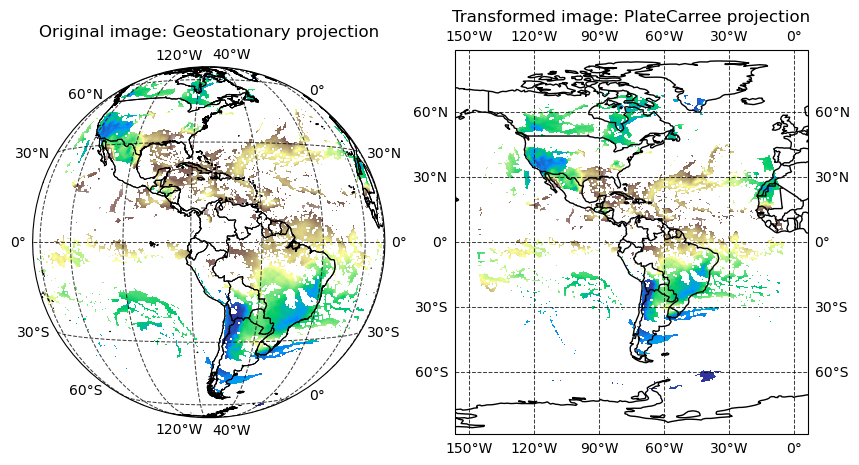

In [52]:
transformed_data, extent_deg = plotBothProjections(data,globals())

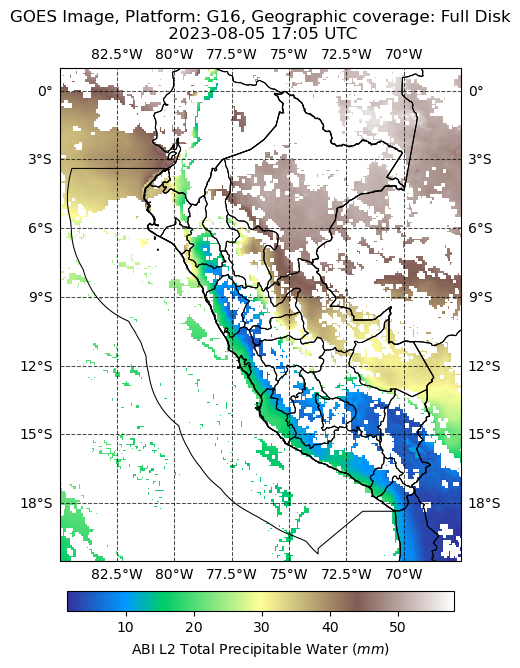

Image 'goes16_2023_08_05_TPWF_17_05.png' saved in '.\GOESimages\goes16\2023\08\05\ABI-L2-TPWF\17'


In [53]:
plotSatImg(data,globals())

In [54]:
def goes_reproj(data, *args, fromto="ang2geo"):
# (Page 23) https://www.goes-r.gov/users/docs/PUG-L1b-vol3.pdf
# https://makersportal.com/blog/2018/11/25/goes-r-satellite-latitude-and-longitude-grid-projection-algorithm#algorithm=
    # GOES-R projection info and retrieving relevant constants
    g16nc = data
    proj_info = g16nc['goes_imager_projection']
    lon_origin = proj_info.longitude_of_projection_origin
    lambda_0 = (lon_origin*np.pi)/180.0 # lat/lon calc routine from satellite radian angle vectors
    H = proj_info.perspective_point_height+proj_info.semi_major_axis
    r_eq = proj_info.semi_major_axis
    r_pol = proj_info.semi_minor_axis
    f = 1/proj_info.inverse_flattening
    e = np.sqrt(f*(2-f))
    
    if len(args) == 0:  # If only one argument is provided
        x_in = g16nc['x'].values[:]
        y_in = g16nc['y'].values[:]
        x_in,y_in = np.meshgrid(x_in,y_in)
        operation_over = "dataset"
    elif len(args) == 2:  # If two arguments are provided
        x_in, y_in = args
        operation_over = "vector"
    else:
        print("Invalid number of arguments.")
    
    if(fromto == "ang2geo"):
        print("Navigating from N/S Elevation Angle (y) and E/W Scanning Angle (x) to Geodetic Latitude (φ) and Longitude (λ)")
        # create meshgrid filled with radian angles

        a_var = np.power(np.sin(x_in),2.0) + (np.power(np.cos(x_in),2.0)*(np.power(np.cos(y_in),2.0)+(((r_eq*r_eq)/(r_pol*r_pol))*np.power(np.sin(y_in),2.0))))
        b_var = -2.0*H*np.cos(x_in)*np.cos(y_in)
        c_var = (H**2.0)-(r_eq**2.0)

        r_s = (-1.0*b_var - np.sqrt((b_var**2)-(4.0*a_var*c_var)))/(2.0*a_var)

        s_x = r_s*np.cos(x_in)*np.cos(y_in)
        s_y = - r_s*np.sin(x_in)
        s_z = r_s*np.cos(x_in)*np.sin(y_in)

        lat_rad = (np.arctan(((r_eq*r_eq)/(r_pol*r_pol))*((s_z/np.sqrt(((H-s_x)*(H-s_x))+(s_y*s_y))))))
        lon_rad = (lambda_0 - np.arctan(s_y/(H-s_x)))
        
        lon_deg, lat_deg = lon_rad*(180.0/np.pi), lat_rad*(180.0/np.pi)
        return lon_deg, lat_deg
    
    elif(fromto == "geo2ang"):
        print("Navigating from Geodetic Latitude (φ) and Longitude (λ) to N/S Elevation Angle (y) and E/W Scanning Angle (x)")
        lon_rad, lat_rad = x_in*(np.pi/180), y_in*(np.pi/180)
        
        phi_c = np.arctan(np.tan(lat_rad)*(r_pol/r_eq)**2)
        
        r_c = r_pol/np.sqrt(1 - (e*np.cos(phi_c))**2)
        
        s_x = H - r_c*np.cos(phi_c)*np.cos(lon_rad - lambda_0)
        s_y = -r_c*np.cos(phi_c)*np.sin(lon_rad - lambda_0)
        s_z = r_c*np.sin(phi_c)
        
        y_rad = np.arctan(s_z/s_x)
        x_rad = np.arcsin(-s_y/np.sqrt(s_x**2 + s_y**2 + s_z**2))
        
        print("phi_c = {}\n r_c = {}\n s_x = {}\n s_y = {}\n s_z = {}".format(phi_c,r_c,s_x,s_y,s_z))
        return x_rad, y_rad
    
    else: print("fromto input should be 'ang2geo' or 'geo2ang'")
    
lon_deg,lat_deg = goes_reproj(data)
# lon = np.linspace(np.nanmin(lon_deg),np.nanmax(lon_deg),Nx)

Navigating from N/S Elevation Angle (y) and E/W Scanning Angle (x) to Geodetic Latitude (φ) and Longitude (λ)


C:\Users\germa\AppData\Local\Temp\ipykernel_3388\911153679.py:34: RuntimeWarning: invalid value encountered in sqrt
  r_s = (-1.0*b_var - np.sqrt((b_var**2)-(4.0*a_var*c_var)))/(2.0*a_var)
